# Static analysis

## Intro - importing

In [51]:
%pip install pandas
import pandas as pd

%pip install pickle
import pickle

%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


Note: you may need to restart the kernel to use updated packages.


In [52]:
with open("data/comments_cleaned", 'rb') as file:
    comments = pickle.load(file)
    
with open("data/submissions_cleaned", 'rb') as file:
    submissions = pickle.load(file)

In [53]:
submissions

,submissions_id,url,permalink,author,created_utc,subreddit,subreddit_id,num_comments,score,over_18
0,648oo,http://www.ignorancedenied.com/viewthread.php?...,/r/reddit.com/comments/648oo/brain_disease_is_...,DITUS,1199145615,reddit.com,t5_6,1,0,False
1,648op,http://www.flascience.org/wp/?p=363,/r/science/comments/648op/three_more_florida_c...,rmuser,1199145634,science,t5_mouw,5,20,False
2,648or,http://hosted.ap.org/dynamic/stories/O/ODD_SHO...,/r/reddit.com/comments/648or/nude_couple_grapp...,zorno,1199145709,reddit.com,t5_6,1,3,False
3,648os,http://www.sltrib.com/opinion/ci_7846101?sourc...,/r/politics/comments/648os/apparently_bushs_pr...,rmuser,1199145735,politics,t5_2cneq,2,0,False
4,648ot,http://hosted.ap.org/dynamic/stories/O/ODD_RAR...,/r/reddit.com/comments/648ot/diners_find_rare_...,zorno,1199145735,reddit.com,t5_6,0,0,False
...,...,...,...,...,...,...,...,...,...,...
2044805,7mq3n,http://ventaboutsports.blogspot.com/2008/12/so...,/r/funny/comments/7mq3n/some_extremely_corny_j...,themightymidget,1230767909,funny,t5_2qh33,0,1,False
2044806,7mq3o,http://www.pbs.org/mormons/etc/genealogy.html,/r/news/comments/7mq3o/pbs_looks_at_the_massiv...,Tom22,1230767926,news,t5_2qh3l,0,0,False
2044807,7mq3q,http://www.narutogames.biz,/r/reddit.com/comments/7mq3q/naruto_games/,bixiebix,1230767937,reddit.com,t5_6,7,1,False
2044808,7mq3r,http://www.youtube.com/watch?v=gdQH1CI4LHY&amp...,/r/politics/comments/7mq3r/ron_paul_on_recent_...,middkidd,1230767963,politics,t5_2cneq,3,1,False


In [54]:
comments

,comments_id,author,link_id,parent_id,created_utc,subreddit,subreddit_id,score
25,c02s9t4,LiberalDemocrat,648os,648os,1199145817,politics,t5_2cneq,1
55,c02s9u6,DiscoWolf,648os,648os,1199146090,politics,t5_2cneq,1
63,c02s9uh,Flemlord,648p5,648p5,1199146155,politics,t5_2cneq,7
69,c02s9un,LiberalDemocrat,648oy,648oy,1199146229,reddit.com,t5_6,0
72,c02s9us,LiberalDemocrat,648p5,648p5,1199146266,politics,t5_2cneq,-10
...,...,...,...,...,...,...,...,...
4873683,c06vwuc,fergie,7k6cl,7k6cl,1229579665,politics,t5_2cneq,2
4873685,c06vwue,wolfzero,7k4if,c06vs7l,1229579675,technology,t5_2qh16,4
4873686,c06vwug,Morgin_Black,7k3w5,7k3w5,1229579679,comics,t5_2qh0s,0
4873687,c06vwui,onezerozeroone,7k2bc,c06vrvz,1229579685,atheism,t5_2qh2p,1


## Actual start of the analysis

### Q1: How many unique subreddits occur? Which has the most comments, and which has the most active users?

I will divide this into 3 questions:

    1. Need to count submissions and comments with unique subreddits 
    2. Need to group and count subreddits by comments
    3. Need to group and count subreddits by users

> Could have used *subreddit_ids* but the name is also unqiue!        


In [55]:
subreddits_authors = pd.concat([submissions[['subreddit', 'author']], comments[['subreddit', 'author']]], ignore_index=True)
subreddits_authors = subreddits_authors.groupby('subreddit').agg({'author': "nunique"})
subreddits_authors = subreddits_authors.sort_values(by="author", ascending=False)
# subreddits_authors

Two birds one stone: 

In [56]:
print("Number of Subreddits:\n\n", subreddits_authors.shape[0])
NUMBER_OF_SUBREDDITS = subreddits_authors.shape[0]
%store NUMBER_OF_SUBREDDITS

Number of Subreddits:

 4191
Stored 'NUMBER_OF_SUBREDDITS' (int)


In [57]:
print("Top 10 with most users:\n\n", subreddits_authors.iloc[:10])

Top 10 with most users:

                author
subreddit            
reddit.com     158641
politics        34902
pics            26759
technology      26070
funny           25615
entertainment   24717
programming     23629
business        23347
science         23332
worldnews       22472


In [58]:
comments_size = comments[['subreddit']].groupby('subreddit').size().reset_index(name='counts')
comments_size = comments_size.sort_values(by="counts", ascending=False)
# comments_size

In [59]:
print("Subreddits with the most comments:\n\n", comments_size.iloc[:10])

Subreddits with the most comments:

           subreddit  counts
1580     reddit.com  738291
1535       politics  526425
1553    programming  255419
1523           pics  187328
1632        science  161279
1870      worldnews  150029
734             WTF  117793
1148          funny  114429
1742     technology   99609
1084  entertainment   96118


### Q2: Avrage number of users per subreddit?

In [60]:
print("Avrage user per subreddit:\n\n", round(subreddits_authors['author'].mean(), 5))

Avrage user per subreddit:

 141.32283


### Q3: Users with the most submissions, users with the most comments

In [61]:
authors_of_submissions = submissions[['author']].groupby('author').size().reset_index(name='counts')
authors_of_submissions = authors_of_submissions.sort_values(by="counts", ascending=False)
# authors_of_submissions

In [62]:
print("Users with the most submissions:\n\n", authors_of_submissions.iloc[:10])

Users with the most submissions:

                   author  counts
84823                gst   18870
141813             qgyh2   12238
147359            rmuser    9822
173691            twolf1    8597
13172   IAmperfectlyCalm    8308
141766         qazamisan    6927
54960          charlatan    5998
90683           igeldard    5373
130852          noname99    5334
64933       democracy101    5332


In [63]:
authors_of_comments = comments[['author']].groupby('author').size().reset_index(name='counts')
authors_of_comments = authors_of_comments.sort_values(by="counts", ascending=False)
# authors_of_comments

In [64]:
print("Users with the most submissions:\n\n", authors_of_comments.iloc[:10])

Users with the most submissions:

                 author  counts
11308  NoMoreNicksLeft    8465
51139       malcontent    7423
52040           matts2    6975
567               7oby    5640
52943       mexicodoug    5499
55356         mutatron    4980
62351        randomb0y    4896
18866        aletoledo    4880
58533        otakucode    4744
19141           alllie    4734


### Q4: Which users are the most active on the biggest number of subreddits? How many subreddits are they active on?

In [65]:
authors_on_subreddits = pd.concat([submissions[['subreddit', 'author']], comments[['subreddit', 'author']]], ignore_index=True)
authors_on_subreddits = authors_on_subreddits.groupby('author').agg({'subreddit': "nunique"})
authors_on_subreddits = authors_on_subreddits.sort_values(by="subreddit", ascending=False)
# authors_on_subreddits

In [66]:
print("Most active users and the number of subreddits they were active:\n\n", authors_on_subreddits.iloc[:10])

Most active users and the number of subreddits they were active:

                 subreddit
author                   
Escafane              152
MrKlaatu              147
omfgninja             111
scientologist2        106
codepoet              103
krugerlive            102
turkourjurbs          101
tuoder                101
bobcat                 98
b34nz                  97


### Q5: Define the correlation between the number of submissions and the number of comments by users. Compute Pearson's coefficient and visualize the results

> https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [67]:
%pip install scipy
from scipy.stats import pearsonr

%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [68]:
author_submissions = submissions[["author"]].groupby("author").size().reset_index(name="submissions_count")
author_comments = comments[["author"]].groupby("author").size().reset_index(name="comments_count")

all_posting = pd.merge(author_submissions, author_comments, how="outer", left_on="author", right_on="author").reset_index().fillna(0)
# all_posting

In [69]:
pearson, ttp = pearsonr(all_posting["submissions_count"], all_posting["comments_count"])
print("Pearson's coefficient is: ", pearson)

Pearson's coefficient is:  0.15579701795119438


Text(0, 0.5, 'Submissions Count')

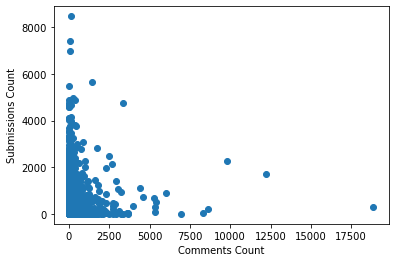

In [70]:
plt.scatter(all_posting["submissions_count"], all_posting["comments_count"])
plt.xlabel("Comments Count")
plt.ylabel("Submissions Count")

In [71]:
print("Comment extreme: ")
author_comments.sort_values(by="comments_count", ascending=False).iloc[:1]

Comment extreme: 


,author,comments_count
11308,NoMoreNicksLeft,8465


In [72]:
print("Submissions extreme: ")
author_submissions.sort_values(by="submissions_count", ascending=False).iloc[:1]

Submissions extreme: 


,author,submissions_count
84823,gst,18870


### Q6: Submissions with the most comments and their subreddits. Show their info (subreddit and context),  skip over18

In [73]:
comments_submissions = comments[["link_id"]].groupby("link_id").size().reset_index(name="counts")
comments_submissions = comments_submissions.sort_values(by="counts", ascending=False)
comments_submissions

,link_id,counts
155775,6nz1k,1313
27284,675oj,1225
351484,7beo2,1074
27511,676ja,961
247824,6z9op,913
...,...,...
201186,6tmfu,1
201187,6tmfz,1
201190,6tmgi,1
201194,6tmh1,1


> These are unflitered comments


In [74]:
sfw_comments = pd.merge(submissions[submissions["over_18"] == False], comments_submissions, how="inner", left_on="submissions_id", right_on="link_id")
sfw_comments = sfw_comments.sort_values(by="counts", ascending=False)
sfw_comments.iloc[:10]

,submissions_id,url,permalink,author,created_utc,subreddit,subreddit_id,num_comments,score,over_18,link_id,counts
154071,6nz1k,http://hundredpushups.com,/r/science/comments/6nz1k/got_six_weeks_try_th...,zekel,1213826517,science,t5_mouw,33329,1621,False,6nz1k,1313
27108,675oj,https://www.reddit.com/r/reddit.com/comments/6...,/r/reddit.com/comments/675oj/post_the_funniest...,matiasklein,1201730171,reddit.com,t5_6,2039,1098,False,675oj,1225
347032,7beo2,https://www.reddit.com/r/politics/comments/7be...,/r/politics/comments/7beo2/obama_wins_the_pres...,willjohnston,1225857637,politics,t5_2cneq,1934,8538,False,7beo2,1074
27334,676ja,http://www.washingtonpost.com/wp-dyn/content/c...,/r/reddit.com/comments/676ja/new_study_confirm...,rpi22,1201748070,reddit.com,t5_6,1377,669,False,676ja,961
244944,6z9op,http://www.google.com/chrome,/r/programming/comments/6z9op/chrome_is_here/,georgeb,1220381356,programming,t5_2fwo,1269,1904,False,6z9op,913
428848,7m6m4,http://www.dailykos.com/story/2008/12/28/11443...,/r/worldnews/comments/7m6m4/today_i_end_my_sup...,Schlichten,1230542729,worldnews,t5_2qh13,1335,1589,False,7m6m4,904
200875,6tvaz,https://www.reddit.com/r/politics/comments/6tv...,/r/politics/comments/6tvaz/im_a_bleedingheart_...,TheRealStick,1217288193,politics,t5_2cneq,1425,788,False,6tvaz,840
162829,6p30u,http://www.nytimes.com/aponline/business/AP-Sc...,/r/reddit.com/comments/6p30u/supreme_court_rul...,jtmarlin,1214490200,reddit.com,t5_6,1053,1071,False,6p30u,787
285037,7488a,http://www.msnbc.msn.com/id/26884523/?,/r/politics/comments/7488a/bailout_does_not_pa...,IM_A_REPTILIAN,1222711101,politics,t5_2cneq,1346,3361,False,7488a,765
133321,6lbr7,http://www.txstudy.org/please.html,/r/reddit.com/comments/6lbr7/is_reddit_really_...,valeriepieris,1212105723,reddit.com,t5_6,1287,492,False,6lbr7,762


In [75]:
print(f"Filtered out: {comments_submissions.shape[0] - sfw_comments.shape[0]} comments from nsfw submissions")
print("Check if any nsfw are left: ", sfw_comments[sfw_comments["over_18"]==True].shape[0])

Filtered out: 6568 comments from nsfw submissions
Check if any nsfw are left:  0
